In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(x_train_image,y_train_label),(x_test_image,y_test_label) = tf.keras.datasets.cifar10.load_data()
x_train_normalize = x_train_image.astype('float32')/255
x_test_normalize = x_test_image.astype('float32')/255
y_train_OneHot = tf.keras.utils.to_categorical(y_train_label)
y_test_OneHot = tf.keras.utils.to_categorical(y_test_label)

In [3]:
def identity_block(x,filters):
    x_input = x
    x = keras.layers.Conv2D(filters = filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2D(filters = filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.Add()([x, x_input])   #与输入进行连接
    x = keras.layers.ReLU()(x)
    return x

In [4]:
def convolutional_block(x,filters):
    x_input = x
    x = keras.layers.Conv2D(filters = filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x = keras.layers.ReLU()(x)
    x = keras.layers.Conv2D(filters = filters, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = keras.layers.BatchNormalization(axis = 3)(x)
    x_input = keras.layers.Conv2D(filters, kernel_size=(1,1), strides = (1,1))(x_input)
    x_input = keras.layers.BatchNormalization(axis = 3)(x_input)
    x = keras.layers.Add()([x, x_input])
    x = keras.layers.ReLU()(x)
    return x

In [5]:
input = keras.layers.Input(shape=(32,32,3))
x = keras.layers.Conv2D(64, (7, 7), strides = (2,2),padding='same')(input)
x = keras.layers.BatchNormalization(axis = 3)(x)
x = keras.layers.ReLU()(x)
x = keras.layers.MaxPooling2D((3, 3), strides = (2,2))(x)
x = convolutional_block(x,64)
x = identity_block(x,64)
x = identity_block(x,64)
x = convolutional_block(x,128)
x = identity_block(x,128)
x = identity_block(x,128)
x = identity_block(x,128)
x = convolutional_block(x,256)
x = identity_block(x,256)
x = identity_block(x,256)
x = identity_block(x,256)
x = identity_block(x,256)
x = identity_block(x,256)
x = convolutional_block(x,512)
x = identity_block(x,512)
x = identity_block(x,512)
x = keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(10,activation='softmax')(x)

In [6]:
model = keras.models.Model(input,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_train = model.fit(x=x_train_normalize,y=y_train_OneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=1)

Epoch 1/10
134/134 [==============================] - 37s 277ms/step - loss: 2.9017 - accuracy: 0.2254 - val_loss: 373.4216 - val_accuracy: 0.1018
Epoch 2/10
134/134 [==============================] - 36s 266ms/step - loss: 1.8378 - accuracy: 0.3954 - val_loss: 4.8793 - val_accuracy: 0.0961
Epoch 3/10
134/134 [==============================] - 36s 267ms/step - loss: 1.8784 - accuracy: 0.4231 - val_loss: 2.0992 - val_accuracy: 0.2952
Epoch 4/10
134/134 [==============================] - 36s 266ms/step - loss: 1.6035 - accuracy: 0.4750 - val_loss: 2.2623 - val_accuracy: 0.4295
Epoch 5/10
134/134 [==============================] - 36s 267ms/step - loss: 1.3760 - accuracy: 0.5360 - val_loss: 4.4106 - val_accuracy: 0.4955
Epoch 6/10
134/134 [==============================] - 36s 267ms/step - loss: 1.2871 - accuracy: 0.5738 - val_loss: 9.2787 - val_accuracy: 0.4207
Epoch 7/10
134/134 [==============================] - 36s 267ms/step - loss: 1.1836 - accuracy: 0.6119 - val_loss: 8.6415 - val_

In [7]:
def train_history(model_train,train,val):
    plt.plot(model_train.history[train])
    plt.plot(model_train.history[val])
    plt.title('Train History')
    plt.xlabel('epoch')
    plt.ylabel(train)
    plt.legend(['train','validation'],loc='upper left')

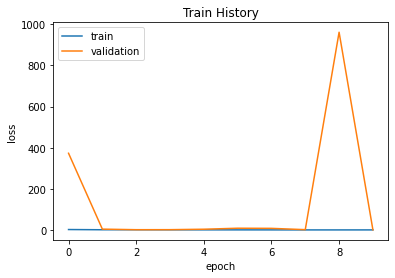

In [8]:
train_history(model_train,'loss','val_loss')

In [9]:
scores = model.evaluate(x_test_normalize,y_test_OneHot,verbose=2)

313/313 - 5s - loss: 1.4745 - accuracy: 0.5184
